# Eficiencia de la ejecución presupuestaria

Febrero 2020

En este notebook se hace un análisis de la eficiencia de la ejecución presupuestaria a nivel de rubros y cuentas para las instituciones del gobierno central.

## Preparación

In [8]:
import sqlite3
import pandas as pd
import seaborn as sns

DB = '../../site/data/accrued.db'

In [9]:
conn = sqlite3.connect(DB)

In [10]:
stmt = """
SELECT 
    year, office, SUBSTR(object, 0, 3)  AS object, 
    SUM(approved) AS approved, 
    SUM(modified) AS modified, 
    SUM(accrued) AS accrued
FROM accrued
GROUP BY year, office, SUBSTR(object, 0, 3)
"""
data = pd.read_sql(stmt, conn)
data = data[data.office.apply(lambda s: s[-2:] == '00')]
data.head()

,year,office,object,approved,modified,accrued
0,2007,0100,51,16932090.0,17038301.99,16935366.30
1,2007,0100,54,6916665.0,6132590.48,5185064.87
2,2007,0100,55,2080000.0,2244055.44,2235710.45
3,2007,0100,56,127000.0,230598.93,229521.02
4,2007,0100,61,2387785.0,3222764.59,2115118.50


In [11]:
data['eff_apr'] = data.accrued / data.approved
data['eff_mod'] = data.accrued / data.modified
data.head()

,year,office,object,approved,modified,accrued,eff_apr,eff_mod
0,2007,0100,51,16932090.0,17038301.99,16935366.30,1.000193,0.993959
1,2007,0100,54,6916665.0,6132590.48,5185064.87,0.749648,0.845493
2,2007,0100,55,2080000.0,2244055.44,2235710.45,1.074861,0.996281
3,2007,0100,56,127000.0,230598.93,229521.02,1.807252,0.995326
4,2007,0100,61,2387785.0,3222764.59,2115118.50,0.885808,0.656306


## By year

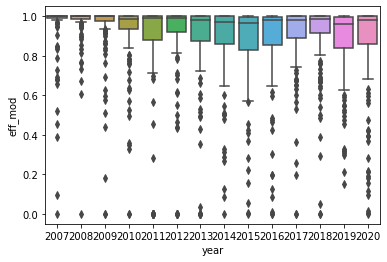

In [12]:
sns.boxplot(x='year', y='eff_mod', data=data)

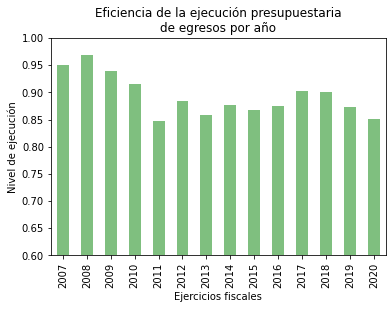

In [41]:
by_year = data.groupby(['year'])['eff_mod'].mean()
ax = by_year.plot(kind='bar', color='green', alpha=0.5)
ax.set_ylim([0.6, 1.0])
ax.set_xlabel('Ejercicios fiscales')
ax.set_ylabel('Nivel de ejecución')
ax.set_title('Eficiencia de la ejecución presupuestaria\nde egresos por año')
ax.figure.savefig('by_year.png')

## By budgetary code

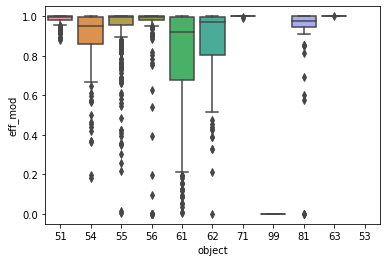

In [14]:
sns.boxplot(x='object', y='eff_mod', data=data)

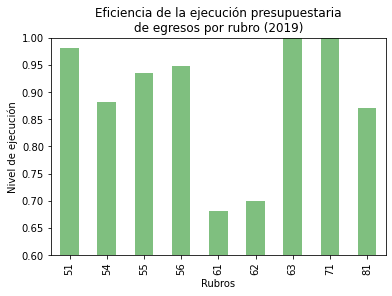

In [52]:
year = 2019
by_object = data[data.year == year].groupby('object')['eff_mod'].mean()
ax = by_object.plot(kind='bar', color='green', alpha=0.5)
ax.set_ylim([0.6, 1.0])
ax.set_ylabel('Nivel de ejecución')
ax.set_xlabel('Rubros')
ax.set_title('Eficiencia de la ejecución presupuestaria\nde egresos por rubro ({})'.format(year))
ax.figure.savefig('by_object.png')

## By office

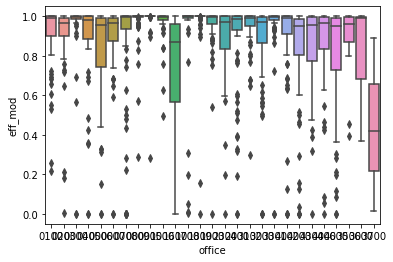

In [53]:
sns.boxplot(x='office', y='eff_mod', data=data)

In [54]:
year = 2019
by_office = data[data.year == year].groupby('office')['eff_mod'].mean().sort_values(ascending=False)
by_office

office
1800    0.999987
0400    0.998448
0300    0.989865
3300    0.982171
0900    0.962222
0800    0.957909
0700    0.952935
4200    0.925809
1500    0.918325
1900    0.912191
2300    0.899877
0100    0.880825
3200    0.870821
0200    0.864789
4100    0.863279
3100    0.842237
3500    0.841105
1600    0.835764
4400    0.832036
1700    0.823212
0600    0.803328
2400    0.774352
4300    0.756490
0500    0.711091
4600    0.711040
Name: eff_mod, dtype: float64

In [55]:
offices = pd.read_sql('SELECT * FROM office', conn)
offices = offices.drop_duplicates('office')
offices['office_name'] = offices.office_name.apply(lambda s: s.strip())
offices.head()

,office,office_name,level
0,0100,Organo Legislativo,1
1,0200,Corte de Cuentas de la República,1
2,0300,Tribunal Supremo Electoral,1
3,0400,Tribunal de Servicio Civil,1
4,0500,Presidencia de la República,1


In [56]:
by_office = by_office.reset_index().merge(offices, on='office', how='left')

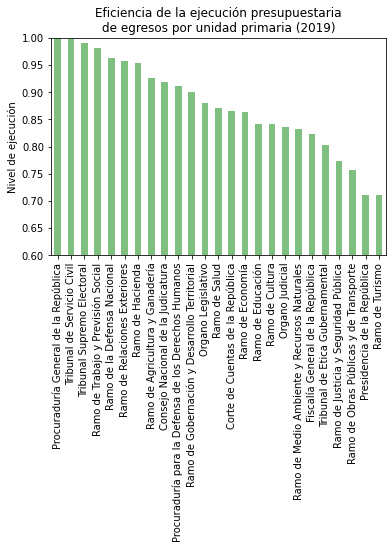

In [58]:
ax = by_office.eff_mod.plot(kind='bar', color='green', alpha=0.5)
ax.set_xticklabels(by_office.office_name, rotation=90)
ax.set_ylim([0.6, 1.0])
ax.set_ylabel('Nivel de ejecución')
ax.set_title('Eficiencia de la ejecución presupuestaria\nde egresos por unidad primaria ({})'.format(year))
ax.figure.savefig('by_office.png')